# Statistiken zur Sprachebene der deutschen Lyrics

In diesem Jupyter Notebook haben wir uns hauptsächlich auf den sprachlichen Stil der deutschen Lyrics beschäfigt. Damit ist gemeint, dass sich die Lyrics genauer angeschaut und auf Auffälligkeiten analysiert wurden. Unterteilt ist das Jupyter Notebook in folgende Unterthemen:

- Worthäufigkeiten
  - allgemein
  - Standorte
- Vielfältigkeit
- Konotation
- Grammatikalische Korrektheit

### Einführung 

In [1]:
# Songs sollen auf songebene betrachtet werden, also wenn libe beispieslsweise 5 mal in einem song vorommt soll es 1 sein und nicht 5.


import pandas as pd
from collections import Counter
import spacy
import spacy.cli
# spacy.cli.download("de_core_news_lg")
# spacy.cli.download("de_core_news_md")
from spacy.language import Language
from spacy_language_detection import LanguageDetector
import pytextrank

In [2]:
df = pd.read_csv("../data/songs_complete_final.csv")

In [3]:
nlp = spacy.load("de_core_news_md")

In [4]:
df['lyrics'] = df['lyrics'].apply(lambda x: nlp(x))

KeyboardInterrupt: 

In [ ]:
# genres gruppieren
df_genre = df.groupby('genre')

# durchschnittliche Lyriclänge pro genre 
avg_lyrics_length = df_genre.mean()['lyrics']

lyrics_length = df_genre.describe()['lyrics']


print(avg_lyrics_length,"\n\n\n", lyrics_length)

### Worthäufigkeiten

In [ ]:
genres = df['genre'].unique()

for genre in genres:
# Filterung nach den genres
    df_g = df[df['genre']== genre]

# kürzeste Lyric herausfinden
    shortest_lyric_title = df_g.loc[df_g['lyrics'].idxmin(), 'songtitle']
    # shortest_lyrics = df.loc[df['lyrics'].apply(len).idxmin(), 'lyrics']
    shortest_lyric_artist = df_g.loc[df_g['lyrics'].idxmin(), 'interpret']
# Anzahl der Wörter in dem Song 
    word_count_short = df[df['genre']== genre]['lyrics'].min()

# längste Lyric herausfinden
    longest_lyric_title = df_g.loc[df_g['lyrics'].idxmax(), 'songtitle']
    longest_lyric_artist = df_g.loc[df_g['lyrics'].idxmax(), 'interpret']
# Anzahl der Wörter in dem Song 
    word_count_long = df[df['genre']== genre]['lyrics'].max()

    print(f"Der kürzeste {genre}-Song ist '{shortest_lyric_title}' von {shortest_lyric_artist} mit insgesamt {word_count_short} Wörtern")
    print(f"Der längste {genre}-Song ist '{longest_lyric_title}' von {longest_lyric_artist} mit insgesamt {word_count_long} Wörtern\n")


In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
lyric_fig = avg_lyrics_length.plot(kind='bar', title='lyric length')
lyric_fig.show()

In [6]:
df.value_counts('genre')

genre
deutschrap      4033
pop             2560
rap             2395
schlager        1343
hip-hop         1271
hip hop         1256
rock             663
indie            632
deutschrock      416
punk rock        390
reggae           264
ambient          222
[]               214
karneval         201
electro          162
deutsch rap      130
instrumental     119
gothic           117
emo              109
cloud rap         69
swing             66
new wave          64
ndw               53
pop rock          53
post-rock         49
party             41
pornorap          27
dubstep           12
metal              5
dtype: int64

### Wie grammatikalisch korrekt sind deutsche Songtexte?

In [ ]:
# !pip install contextualSpellCheck
import contextualSpellCheck

# spacy.cli.download("de_core_news_lg")


nlp = spacy.load('de_core_news_lg')
contextualSpellCheck.add_to_pipe(nlp)


In [ ]:
# Funktion zur Überprüfung der Rechtschreibung
def grammar_check(lyric):
    doc = nlp(lyric)
    return doc._.performed_spellCheck, doc._.outcome_spellCheck

texts = list(df["lyrics"].iloc[:50])
docs = nlp.pipe(texts)  


for i, doc in enumerate(docs):
    row = df.loc[i, "lyrics"]
    performed_spell_check, outcome_spell_check = grammar_check(row)
    print("Performed spell check:", performed_spell_check)
    print("Outcome of spell check:", outcome_spell_check)


Performed spell check: True
Outcome of spell check: Peter ce, das im Raper, dast Kindergarten, hat es Mann, das das hat in dieben. Es. KUKU TEAM, bin zu demt für hat miten, das bin is so ##m die., mit dem Bastard mit die Gnadenschuss Der die die Mann, der hat und die Mannn Herr, den den und, mit im Fladenbrot Was die Stern, Sofa so die das Packs, Max, Die, Die, das dien Was is das für dieen, das zu die Mann? Die Aura -? Der verschwinde zu den Radius Der die Tag so die den, der Herr, das in Ein die,en und mit scheißegal. legal, illegal, mit der scheißegal
Performed spell check: True
Outcome of spell check: Berlin, Die. The. The. Ther -t Je, j, ha, diet  Ducht du, du, es, Herr escht, Die bin Tag, das in Tag, Tag ims der Tag. Es gut mit die, in is Tag in Es bed es dir, es is Tag, So est die hat. Du, es, Herr escht. Derben zu dir dir dir das hene zu dir, ese mit, dir Herr und die an, easy Die denennät von dem. Ein Film in dir zu doll, dir von der forland, der wart mit diee dut, Memory Lost

MemoryError: 

In [ ]:
texts = df["lyrics"].iloc[:10]  # Konvertiere die Spalte "lyrics" in eine Liste von Texten
#docs = nlp(texts) 

for row in texts:
    doc = nlp(row)
    print(row, doc)
    print(doc._.performed_spellCheck) #Should be True
    print(doc._.outcome_spellCheck)

  Manchmal hast du gar nichts mehr Nur noch deinen kleinen Traum Und dann wiegt es Tonnen schwer Du bist wie Luft ohne Raum Manchmal geht die Liebe fort Und es regnet dir ins Herz Die Welt begräbt dich lebend Und jeder Atemzug schmerzt Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Manchmal hinterfragst du alles Hörst damit auch Nachts nicht auf Sitzt im Treppenhaus und wartest Denn du traust dich nicht nachhaus' Manchmal geht die Liebe unter Und im Sommer wird es kalt Läufst die Straßen rauf und runter So wie ein Zug ohne Halt  Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Ich bin da, wenn d

In [ ]:
tool = LanguageTool('de')
results = []

# Funktion zur Überprüfung der Grammatik
def grammar_check(lyric):
    matches = tool.check(lyric)
    total_errors = len(matches)
    total_words = len(lyric.split())
    percentage_correct = ((total_words - total_errors) / total_words) * 100

    return percentage_correct

df_copy = df.sample(frac=1).reset_index(drop=True)

count = 0
for idx, row in df_copy.iterrows():
    if count >= 200:
        break
    text = row['lyrics']
    count+= 1
    song_title = row['title']
    genre = row['genre']
    lyric_num = idx
    score_correct = f"{grammar_check(text):.2f}"
    score_incorrect = 100 -float(score_correct)

    matches = tool.check(text)
    for match in matches:
        message = match.message
        
    result = {'song_title': song_title, 'lyric_num': lyric_num, 'genres': genre, "score_correct": score_correct , "score_incorrect": score_incorrect , "message": message}

    results.append(result)



In [ ]:
grammar_results = pd.DataFrame(results)
grammar_results

,song_title,lyric_num,genres,score_correct,score_incorrect,message
0,Hamburg,0,hip hop,92.59,7.41,Außer am Satzanfang werden nur Nomen und Eigen...
1,Wären alle so wie du,1,pop rock,84.96,15.04,Außer am Satzanfang werden nur Nomen und Eigen...
2,Neue Schritte,2,deutschrap,94.25,5.75,Außer am Satzanfang werden nur Nomen und Eigen...
3,Das geht auch vorbei,3,hip hop,90.11,9.89,Außer am Satzanfang werden nur Nomen und Eigen...
4,Frei,4,deutschrap,89.45,10.55,Außer am Satzanfang werden nur Nomen und Eigen...
...,...,...,...,...,...,...
195,Lui V alles,195,deutschrap,94.47,5.53,Möglicher Tippfehler: mehr als ein Leerzeichen...
196,Money,196,deutschrap,94.85,5.15,Außer am Satzanfang werden nur Nomen und Eigen...
197,Lullaby,197,deutschrap,92.18,7.82,"Bitte prüfen Sie, ob „Besseres“ hier großgesch..."
198,Und nun fängt alles das noch mal von vorne an,198,pop,85.03,14.97,Außer am Satzanfang werden nur Nomen und Eigen...


In [ ]:
grammar_results['score_correct'] = pd.to_numeric(grammar_results['score_correct'])
grammar_results['score_incorrect'] = pd.to_numeric(grammar_results['score_incorrect'])

grammar_total_correct = grammar_results.groupby('genres')['score_correct'].mean()
grammar_total_incorrect =  grammar_results.groupby('genres')['score_incorrect'].mean()

grammar_total_incorrect


genres
[]               6.110000
ambient         10.130000
cloud rap        6.450000
deutschrap       9.272632
deutschrock     14.181667
electro         11.920000
emo             13.480000
hip hop         11.177500
hip-hop          8.820000
indie           11.301429
instrumental    11.853333
karneval        13.284000
ndw              9.105000
new wave        14.290000
party           15.250000
pop             11.085769
pop rock        15.040000
post-rock        9.305000
punk rock        8.205000
rap              9.092381
reggae          11.490000
rock            10.558889
schlager        11.759333
swing           13.685000
Name: score_incorrect, dtype: float64

In [ ]:
grammar_total_correct

genres
[]              93.890000
ambient         89.870000
cloud rap       93.550000
deutschrap      90.727368
deutschrock     85.818333
electro         88.080000
emo             86.520000
hip hop         88.822500
hip-hop         91.180000
indie           88.698571
instrumental    88.146667
karneval        86.716000
ndw             90.895000
new wave        85.710000
party           84.750000
pop             88.914231
pop rock        84.960000
post-rock       90.695000
punk rock       91.795000
rap             90.907619
reggae          88.510000
rock            89.441111
schlager        88.240667
swing           86.315000
Name: score_correct, dtype: float64

In [ ]:
grammar_per_genre = pd.concat([grammar_total_correct, grammar_total_incorrect], axis=1).reset_index()
grammar_per_genre.columns = ['genres', 'score_correct', 'score_incorrect']

In [ ]:
grammar_per_genre_new = pd.melt(grammar_per_genre, id_vars='genres', var_name='score_type', value_name='score')
grammar_per_genre_new['score_type'] = grammar_per_genre_new['score_type'].map({'score_correct': 'Korrekt', 'score_incorrect': 'Inkorrekt'})


In [ ]:
grammar_per_genre_new

,genres,score_type,score
0,[],Korrekt,93.890000
1,ambient,Korrekt,89.870000
2,cloud rap,Korrekt,93.550000
3,deutschrap,Korrekt,90.727368
4,deutschrock,Korrekt,85.818333
5,electro,Korrekt,88.080000
6,emo,Korrekt,86.520000
7,hip hop,Korrekt,88.822500
8,hip-hop,Korrekt,91.180000
9,indie,Korrekt,88.698571


In [ ]:
fig = px.sunburst(grammar_per_genre_new, path=['genres', "score_type"], values='score' )

fig.update_layout(
    title={
        'text': "Grammatikalische Korrektheit von Songtexten",
        'x': 0.5
    }
)

fig.show()


#### Welches Genre ist am ausdrucksvollsten?

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

pop_nouns = []
rap_nouns = []

for title in pop_df["songtitle"]:
    doc = nlp(title)
    for token in doc:
        if token.pos_ == 'NOUN':
            pop_nouns.append(token.text)

for title in rap_df["songtitle"]:
    doc = nlp(title)
    for token in doc:
        if token.pos_ == 'NOUN':
            rap_nouns.append(token.text)

pop_noun_count = Counter(pop_nouns)
rap_noun_count = Counter(rap_nouns)

pop_common_nouns = pop_noun_count.most_common(15)
print(pop_common_nouns)
rap_common_nouns = rap_noun_count.most_common(15)

[('Liebe', 16), ('Zeit', 14), ('Welt', 13), ('Leben', 12), ('Nacht', 11), ('Tag', 9), ('Weg', 8), ('Herz', 7), ('Sommer', 6), ('Morgen', 6), ('Mensch', 6), ('Himmel', 6), ('Lied', 6), ('Ende', 5), ('Angst', 5)]


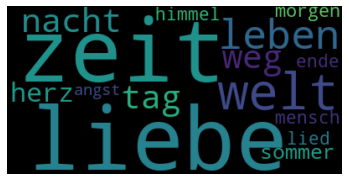

In [ ]:
pop_nouns_text = ' '.join([noun for noun, count in pop_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(pop_nouns_text)
# docs.post_
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

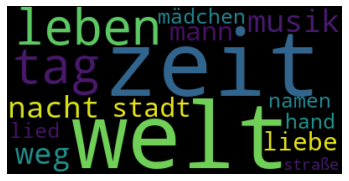

In [ ]:
rap_nouns_text = ' '.join([noun for noun, count in rap_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(rap_nouns_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# !pip install spacy_sentiws

In [ ]:
# https://spacy.io/universe/project/spacy-sentiws
# https://spacy.io/universe/project/spacy-textblob

In [ ]:
sentiws_path = '../data/sentiws'
nlp.add_pipe("sentiws", config={"sentiws_path": sentiws_path})

In [ ]:
df['positive_words'] = ''
df['negative_words'] = ''

for idx, row in df.iterrows():
    text = row['lyrics']
    positive_words = []
    negative_words = []
    doc = nlp(text)
    for token in doc:
        sentiment = token._.sentiws
        if isinstance(sentiment, float):
            if sentiment > 0:
                positive_words.append(token.text)
            elif sentiment < 0:
                negative_words.append(token.text)
    df.at[idx, 'positive_words'] = ', '.join(set(positive_words))
    df.at[idx, 'negative_words'] = ', '.join(set(negative_words))

In [ ]:
df

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,positive_words,negative_words
0,NaN,Adel Tawil,NaN,2023,Fenster,0,9061124,Fenster by Adel Tawil,"{'year': 2023, 'month': 4, 'day': 28}",2023-04-28,"{'unreviewed_annotations': 0, 'hot': False}",Sitze an mei'm offenen Fenster Warte drauf d...,Friday,127,"Wissen, führen, Glück","aufgehört, brennt, fallen"
1,NaN,Adel Tawil,NaN,2023,Venus & Mars,0,8616439,Venus & Mars by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Nur einmal Wir sind Venus und Mars Einhunde...,Friday,100,Frieden,"Krieg, streiten"
2,NaN,Adel Tawil,NaN,2023,Spiegelbild,0,8616443,Spiegelbild by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}","Wie konnt ich glauben, dass es gut ist Dass ...",Friday,77,"verstanden, Duft, neuer","Dreck, Flucht"
3,NaN,Adel Tawil,NaN,2023,Nirvana,0,8616448,Nirvana by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Fahr' auf endlosen Straßen Weiter Richtung N...,Friday,147,Glück,"schlägt, Schließt, Ende, fehlt"
4,NaN,Adel Tawil,NaN,2023,Leuchten,0,8616445,Leuchten by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Wir hatten nur die größten Zeiten In jedem n...,Friday,78,"größten, freut","fehlt, kleiner, schlechten, unten, zweifelt"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,Schlager,Wolfgang Petry,Achterbahn,2001,Du hast mein Herz geklaut,2000,716319,Du hast mein Herz geklaut by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Die Luft ist raus - ich glaub nicht mehr an W...,NaN,53,Wunder,
7786,Schlager,Wolfgang Petry,Achterbahn,2001,Leg dein Gesicht an mein Gesicht,2000,716326,Leg dein Gesicht an mein Gesicht by Wolfgang P...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Du wolltest deine Freiheit haben Nun stehst d...,NaN,51,"Sinn, Liebe, Freiheit",
7787,Schlager,Wolfgang Petry,Achterbahn,2001,Scheisse ist braun,2000,716331,Scheisse ist braun by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}","Wenn die Sonne untergeht in der Provinz, ho h...",NaN,94,Verstand,untergeht
7788,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Jetzt oder nie,2000,1447255,Mit offenen Armen by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Wolfgang Petry - Anfang Vom Ende Lyrics Briefe...,NaN,50,Liebe,"Ende, gefehlt"


[('glück', 447), ('liebe', 335), ('freunde', 322), ('neue', 306), ('ziel', 278), ('sinn', 274), ('freund', 248), ('spaß', 238), ('macht', 217), ('große', 216), ('wahrheit', 209), ('feiern', 181), ('neuen', 176), ('freiheit', 170), ('beste', 168)]


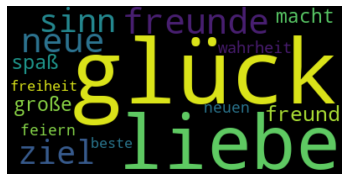

In [ ]:
positive_words = ' '.join([word.lower() for word in df['positive_words']])
positive_word_list = positive_words.split(', ')

positive_word_count = Counter(positive_word_list)
most_common_positive_words = positive_word_count.most_common(15)
print(most_common_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_positive_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[('angst', 552), ('ende', 549), ('krieg', 278), ('brennt', 221), ('dreck', 220), ('kleine', 220), ('unten', 219), ('problem', 219), ('tränen', 216), ('hass', 213), ('tod', 203), ('alte', 203), ('feuer', 179), ('schmerz', 174), ('bricht', 173)]


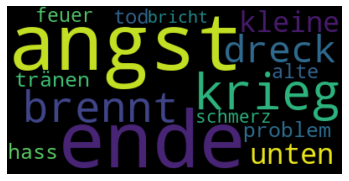

In [ ]:
negative_words = ' '.join([word.lower() for word in df['negative_words']])
negative_words_list = negative_words.split(', ')

negative_word_count = Counter(negative_words_list)
most_common_negative_words = negative_word_count.most_common(15)
print(most_common_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
word_counts = {}
for word in positive_word_list:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 50}

words = list(filtered_word_counts.keys())
counts = list(filtered_word_counts.values())

fig = go.Figure(data=go.Scatter(
    x=words,
    y=counts,
    mode='markers',
    marker=dict(
        size=counts,
        sizemode='area',
        sizeref=max(counts) / 1000,
        color=counts,
        colorscale='thermal',
        showscale=True
    ),
))

fig.update_layout(
    title='Positive Words Bubble Chart (mindestens 50 Mal auftretende Wörter)',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Counts'),
    showlegend=False
)

fig.show()


### Wie vielfältig sind deutsche Songtexte?

In [ ]:
song_variety = []


count = 0
for idx, row in df_copy.iterrows():
    if count >= 100:
        break
    text = row['lyrics']
    song_title = row['songtitle']
    genre = row['genre']
    count+= 1
    
    # Text mit Spacy analysieren
    doc = nlp(text)
    
    wortarten = ['NOUN', 'VERB', 'ADJ', 'ADV']
    unique_words = set()
    for token in doc:
        if not token.is_stop and token.is_alpha and token.pos_ in wortarten:
            unique_words.add(token.lemma_)
    

    song_uniqueness =  {'song_title': song_title, 'lyric_num': idx, 'genres': genre, "unique_words": unique_words}

    
    song_variety.append(song_uniqueness)


In [ ]:
song_variety_df = pd.DataFrame(song_variety)

In [ ]:
song_variety_df

,song_title,lyric_num,genres,unique_words
0,Danke,0,Pop,"{stattdessen, spenden, tun, hinterlassen, Welt..."
1,Die Suche geht weiter,1,Pop,"{scheinen, strahlen, Atem, fragen, einfach, ha..."
2,Gegen die Wand,2,Rap,"{reden, erreichen, frontet, Competition, schre..."
3,Der Malocher,3,Rock,"{schlucken, Weib, Zuhaus, TV, Klasse, glauben,..."
4,Ins Blaue,4,Pop,"{egal, Stadt, scheinen, yeah, einfach, fließen..."
5,Die Welt Dreht sich,5,Pop,"{längst, Wintertag, fast, Bedeutung, Welt, fra..."
6,Wenn wir schlafen,6,Pop,"{Stadt, Kiosk, sauber, Balkon, Haus, Pisse, üb..."
7,Irgendwo dazwischen,7,Pop,"{Freund, tuts, verleihen, fern, kaputt, Bauch,..."
8,Unkenrufe,8,Pop,"{egal, Sicht, Gesicht, Stunde, Bild, Fuß, Hint..."
9,Player 4 Life,9,Rap,"{einfach, heut, schreiben, wissen, Weg, erkenn..."


In [ ]:
unique_words_len = []
for row in song_variety_df["unique_words"]:
    unique_words_len.append(len(row))

song_variety_df["unique_words_len"] = unique_words_len

In [ ]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len
0,Danke,0,Pop,"{stattdessen, spenden, tun, hinterlassen, Welt...",57
1,Die Suche geht weiter,1,Pop,"{scheinen, strahlen, Atem, fragen, einfach, ha...",37
2,Gegen die Wand,2,Rap,"{reden, erreichen, frontet, Competition, schre...",95
3,Der Malocher,3,Rock,"{schlucken, Weib, Zuhaus, TV, Klasse, glauben,...",74
4,Ins Blaue,4,Pop,"{egal, Stadt, scheinen, yeah, einfach, fließen...",48
5,Die Welt Dreht sich,5,Pop,"{längst, Wintertag, fast, Bedeutung, Welt, fra...",69
6,Wenn wir schlafen,6,Pop,"{Stadt, Kiosk, sauber, Balkon, Haus, Pisse, üb...",22
7,Irgendwo dazwischen,7,Pop,"{Freund, tuts, verleihen, fern, kaputt, Bauch,...",31
8,Unkenrufe,8,Pop,"{egal, Sicht, Gesicht, Stunde, Bild, Fuß, Hint...",48
9,Player 4 Life,9,Rap,"{einfach, heut, schreiben, wissen, Weg, erkenn...",94


In [ ]:
unique_words_stats = song_variety_df.groupby('genres')['unique_words_len'].describe()
unique_words_stats.reset_index()

,genres,count,mean,std,min,25%,50%,75%,max
0,Pop,15.0,44.133333,14.686567,22.0,30.50,48.0,55.50,69.0
1,Rap,21.0,110.904762,34.011623,34.0,91.00,107.0,135.00,166.0
2,Rock,16.0,50.000000,20.099751,25.0,36.25,44.0,57.25,100.0
3,Schlager,7.0,38.285714,15.882005,7.0,36.00,40.0,46.00,57.0


In [ ]:
unique_score =[]

for row in song_variety_df["unique_words"]:
    unique_words_total = ' '.join(unique_words)
    doc = nlp(unique_words_total)
    
    

In [ ]:
song_variety_df["score"] = unique_score

In [ ]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len,score
0,Danke,0,Pop,"{stattdessen, spenden, tun, hinterlassen, Welt...",57,1.0
1,Die Suche geht weiter,1,Pop,"{scheinen, strahlen, Atem, fragen, einfach, ha...",37,1.0
2,Gegen die Wand,2,Rap,"{reden, erreichen, frontet, Competition, schre...",95,1.0
3,Der Malocher,3,Rock,"{schlucken, Weib, Zuhaus, TV, Klasse, glauben,...",74,1.0
4,Ins Blaue,4,Pop,"{egal, Stadt, scheinen, yeah, einfach, fließen...",48,1.0
5,Die Welt Dreht sich,5,Pop,"{längst, Wintertag, fast, Bedeutung, Welt, fra...",69,1.0
6,Wenn wir schlafen,6,Pop,"{Stadt, Kiosk, sauber, Balkon, Haus, Pisse, üb...",22,1.0
7,Irgendwo dazwischen,7,Pop,"{Freund, tuts, verleihen, fern, kaputt, Bauch,...",31,1.0
8,Unkenrufe,8,Pop,"{egal, Sicht, Gesicht, Stunde, Bild, Fuß, Hint...",48,1.0
9,Player 4 Life,9,Rap,"{einfach, heut, schreiben, wissen, Weg, erkenn...",94,1.0


In [ ]:
song_variety_fig = song_variety_df.plot(kind="box",  x="genres", y="unique_words_len", title="Wie viele einzigartige Wörter gibt es in deutschen Songetxten")
song_variety_fig.show()

In [ ]:
song_variety_df["unique_words_len"].sum()

4059

In [ ]:
words_total_list = [ word for row in song_variety_df["unique_words"] for word in row ]

unique_word_count = {}
for word in words_total_list:
    if word in unique_word_count:
        unique_word_count[word] += 1
    else:
        unique_word_count[word] = 1

unique_word_count_df = pd.DataFrame(list(unique_word_count.items()), columns=['word', 'count'])
unique_word_count_df


,word,count
0,stattdessen,1
1,spenden,2
2,tun,10
3,hinterlassen,1
4,Welt,15
...,...,...
2442,Scheinwerfer,1
2443,Schlüssel,1
2444,angstn,1
2445,Bereeeit,1


In [ ]:
unique_word_count_fig = unique_word_count_df.sort_values('count', ascending=False).iloc[:50].plot(kind="line",x="word",y="count", title="Welche Wörter kommen am meisten vor")
unique_word_count_fig.update_layout(xaxis_tickangle=45)
unique_word_count_fig.update_traces(hovertemplate='Word: %{x}<br>Count: %{y}<br>Text: %{text}')

unique_word_count_fig.show()

### Locations

In [ ]:
import pandas as pd
import spacy
from spacy.tokens import Doc
import spacy.cli
spacy.cli.download("de_core_news_md")
from spacy.language import Language
from spacy_language_detection import LanguageDetector

c:\Users\lotus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_md')


In [ ]:
df = pd.read_csv('../data/songs_complete_final.csv')

In [ ]:
nlp = spacy.load("de_core_news_md")

In [ ]:
locations = []
unique_locations = set()
 
for song in df["lyrics"]:
    doc = nlp(song)
    for ent in doc.ents:
        if ent.label_ == "LOC":
            locations.append(ent.text)
        elif ent.label_ == "GPE":
            locations.append(ent.text)


#print(locations)

In [ ]:
print(len(locations))

41501


In [ ]:
import pycountry

filtered_locations = []
for location in locations:
    try:
        country = pycountry.countries.get(alpha_2=location.upper())
        filtered_locations.append(location)
    except LookupError:
        print(f"{location} is not a valid ISO country code")

print(filtered_locations)

['Dicka', 'Mehringdamm', 'Pac  Werf', 'Weezy', 'Leuchtclips', 'Breslauer', 'UF', 'Streetchabos Ich hab schöne Eier', 'Nenn', 'Erde', 'Stadt', 'Hessens', 'Mond', 'Sehe', 'Texas', 'Hampton Coliseum Live   ', 'kring Som om inget', 'Som om', 'Så ge', 'minns dagarna', 'Park Och', 'och döden', 'allting i sin', 'Reibach', 'Hahaha Woop', 'woop', 'Ey', 'Papa', 'Papa', 'Deutschland', 'Jannidis', 'Stuttgart', 'Tübingen', 'Jannidis', 'Stuttgart', 'Jannidis', 'Stuttgart', 'Lüneburg', 'Berlin', 'Bielefeld', 'Gymnich', 'Trier', 'Frankfurt am Main', 'Hamburg', 'Frankfurt am Main', 'Paderborn', 'Bielefeld', 'Wood', 'TrackAntilopen Gang  ', 'Europas', 'Big Bad BirdsEdgar', 'Ey', 'Sorry', 'Ma', 'Hab', 'Straße', 'SillaCode', 'Chardonnay Chardonnay Hörn', 'Straße gehen  ', 'Stadt', 'zitiern', 'Zеilen', 'lembellisement de la vie', 'lembellisement de la vie', 'HipHopFahne', 'Russland', 'tupac', 'stuttgarter barrios', 'Weil', 'bewahrtn', 'bboys', 'spreadens', 'Juri', 'Straße', 'Pussies nass', 'Tapilanien', 'B

In [ ]:
from geotext import GeoText

#locations_sample = locations[:1000]

def is_valid_location(location):
    if GeoText(location).cities:
        places = GeoText(location).cities
        return True


    elif GeoText(location).countries:
        places = GeoText(location).countries
        return True


valid_locations = [location for location in locations if is_valid_location(location) == True]

print(valid_locations)

['Texas', 'Stuttgart', 'Stuttgart', 'Stuttgart', 'Berlin', 'Bielefeld', 'Trier', 'Hamburg', 'Paderborn', 'Bielefeld', 'Mitchell  Ness Weiber', 'Berlin', 'Offenbach am Main', 'Finland', 'Holland', 'Venlo', 'Holland', 'Medellín', 'Medellín', 'Venlo', 'Amsterdam', 'Casablanca', 'Amsterdam', 'Amsterdam', 'China', 'Marbella', 'Amsterdam', 'Rotterdam', 'Hamburg', 'Bolivia', 'Marseille', 'Rotterdam', 'Holland', 'Rotterdam', 'Dortmund', 'Dortmund', 'Hamada', 'Hemşo Ich schmuggel', 'Venlo', 'Ecuador', 'Dortmund', 'Dortmund', 'Amsterdam', 'Rotterdam', 'Dortmund', 'bambambam Dortmund', 'Ghana  ', 'Dortmund', 'Dortmund', 'Dortmund', 'China', 'Dortmund', 'Amsterdam', 'Dortmund', 'Paris Fuck the Police  ', 'Rotterdam', 'Tempelhof', 'Schöneberg', 'Rotterdam', 'Nijmegen', 'Stuttgart', 'Dortmund', 'Heidelberg', 'Straße  Straight Flush Dortmund', 'Berlin', 'Essen', 'Bam', 'badabam Bam', 'Herzogenaurach', 'Holland', 'Paris', 'China', 'Ibiza', 'Holland', 'Holland', 'Holland', 'Ganja', 'Boom', 'Boom', 'Hol

In [ ]:
from collections import Counter

valid_locations_dict = dict(Counter(valid_locations))

print(valid_locations_dict)

{'Texas': 8, 'Stuttgart': 29, 'Berlin': 524, 'Bielefeld': 5, 'Trier': 1, 'Hamburg': 142, 'Paderborn': 1, 'Mitchell  Ness Weiber': 1, 'Offenbach am Main': 9, 'Finland': 1, 'Holland': 38, 'Venlo': 10, 'Medellín': 8, 'Amsterdam': 35, 'Casablanca': 5, 'China': 27, 'Marbella': 3, 'Rotterdam': 15, 'Bolivia': 4, 'Marseille': 17, 'Dortmund': 27, 'Hamada': 1, 'Hemşo Ich schmuggel': 1, 'Ecuador': 3, 'bambambam Dortmund': 1, 'Ghana  ': 2, 'Paris Fuck the Police  ': 1, 'Tempelhof': 15, 'Schöneberg': 23, 'Nijmegen': 1, 'Heidelberg': 3, 'Straße  Straight Flush Dortmund': 1, 'Essen': 21, 'Bam': 1, 'badabam Bam': 1, 'Herzogenaurach': 1, 'Paris': 195, 'Ibiza': 23, 'Ganja': 7, 'Boom': 2, 'Wau': 2, 'Iran': 13, 'Schöne dran  Man': 1, 'Moers': 1, 'Baden gehn   Grad': 1, 'Caracas': 1, 'Reeperbahn Hab Hamburg': 1, 'Cottbus': 1, 'Ami': 7, 'Mardin': 8, 'town  Hamburg': 1, 'Norderstedt': 1, 'ansBeinPisser  Wer bistn du': 1, 'Vietnam': 3, 'New York': 79, 'London': 35, 'Meppen': 2, 'Po Mensch Bo  ': 2, 'Bonn': 29

In [ ]:
valid_locations_df = pd.DataFrame(list(valid_locations_dict.items()), columns=['Location', 'Count'])

In [ ]:
valid_locations_df

,Location,Count
0,Texas,8
1,Stuttgart,29
2,Berlin,524
3,Bielefeld,5
4,Trier,1
...,...,...
823,Delphin Imperial Trump Tower New York,1
824,Paris le Meridien Flaschen,1
825,Zion,2
826,Jericho,1


In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
import plotly.graph_objects as go
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")

latitudes = []
longitudes = []
marker_sizes = []
hover_texts = []

for location, count in valid_locations_dict.items():
    try:
        geocode = geolocator.geocode(location)
        if geocode is not None:
            lat = geocode.latitude
            lon = geocode.longitude
            
            latitudes.append(lat)
            longitudes.append(lon)
            
            marker_size = count / max_count * 50 
            marker_sizes.append(marker_size)
            hover_text = f"{location}<br>Count: {count}"
            hover_texts.append(hover_text)
    except:
        pass

location_map = go.Figure(data=go.Scattergeo(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=marker_sizes,
        color='blue',
        opacity=0.7,
        line=dict(width=0)
    ),
    hovertemplate=hover_texts
))

location_map.update_layout(
    title='Standorte',
    geo=dict(
        resolution=110,
        showland=True,
        landcolor='lightgray',
        showcountries=True,
        countrycolor='white',
        coastlinecolor='white',
        projection_type='natural earth'
    ),
    width=2000,
    height=1200
)

location_map.show()

In [6]:
import pandas as pd
from germansentiment import SentimentModel


# Laden des Sentiment-Modells für die deutsche Sprache
model = SentimentModel()

# Gruppieren der Daten nach Genre und Durchführen der Sentimentanalyse pro Genre
sentiment_results = {}
for genre, group in df.groupby('genre'):
    lyrics = group['lyrics'].tolist()
    
    # Verringerung der Datenmenge
    count = 0
    for idx, row in df.iterrows():
        if count >= 100:
            break
        lyrics.append(row['lyrics'])
        count += 1
    
    texts = [text.text if isinstance(text, spacy.tokens.doc.Doc) else text for text in lyrics]
    classes, probabilities = model.predict_sentiment(texts, output_probabilities=True)
    sentiment_results[genre] = list(zip(classes, probabilities, lyrics))

# Ausgabe der Ergebnisse pro Genre
for genre, results in sentiment_results.items():
    print(f"Genre: {genre}")
    for sentiment, probability, lyrics in results:
        print(f"Sentiment: {sentiment}, Probability: {probability}")
        print(f"Lyrics: {lyrics}")
        print()

RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3951034368 bytes.